### IMPORTING PACKAGES ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.pyplot import style ; style.use('ggplot') 

### TRAVERSING DATASET ###

In [3]:
df = pd.read_csv('bupa.data',sep=',')
df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


### COUNT PLOT FOR CHECKING IM-BALANCED DATASET ###

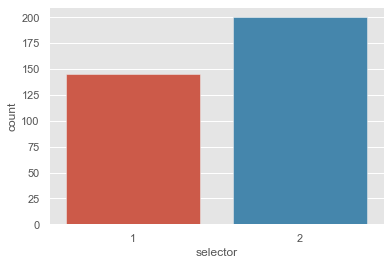

In [4]:
sns.countplot(x=df.selector)

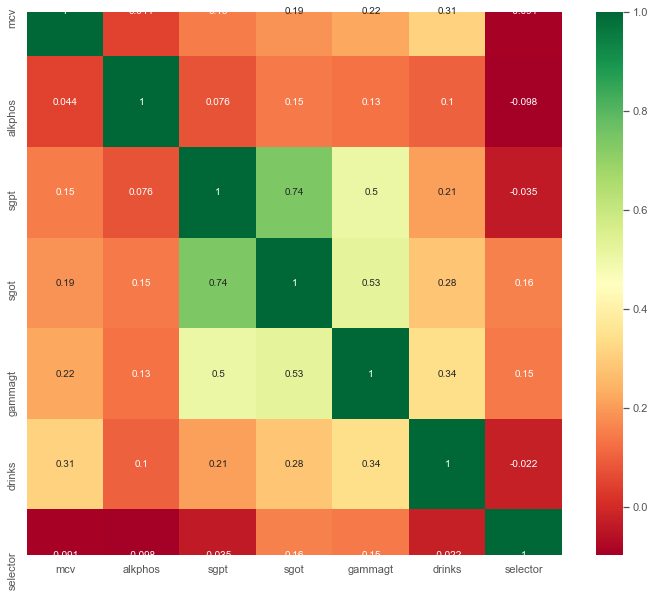

In [5]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)
plt.show()

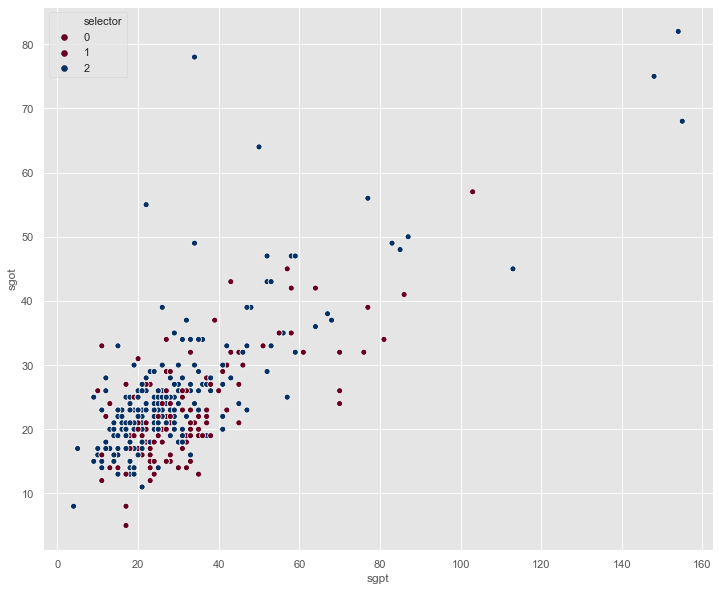

In [15]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df.sgpt,y=df.sgot,hue=df.selector,palette='RdBu')
plt.show()

In [16]:
df.drinks.unique()

array([ 0. ,  0.5,  1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. ,
       10. , 12. , 16. , 20. , 15. ])

### DATA REDUCTION ###

In [18]:
from sklearn.decomposition import PCA
pca =PCA(2)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y)
pca.fit(x,y)
x_pca = pca.transform(x)

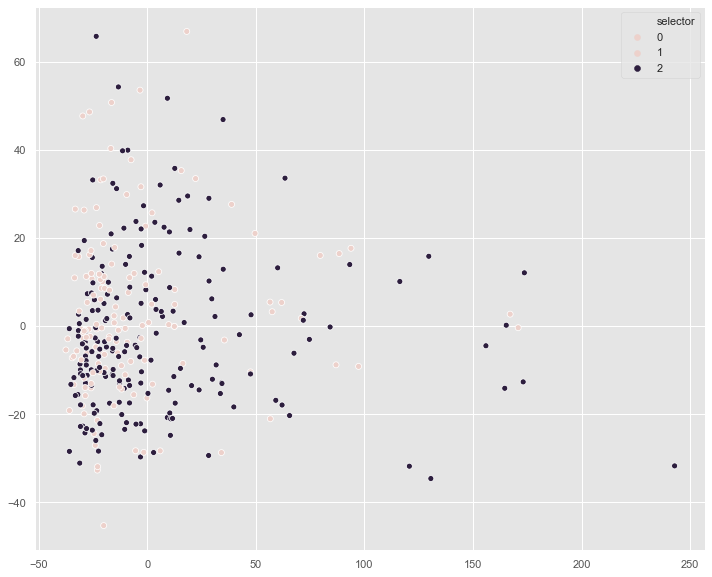

In [21]:
plt.figure(figsize=(12,10))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=df.selector)
plt.show()

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(2)

In [23]:
x_tsne = tsne.fit_transform(x,y)

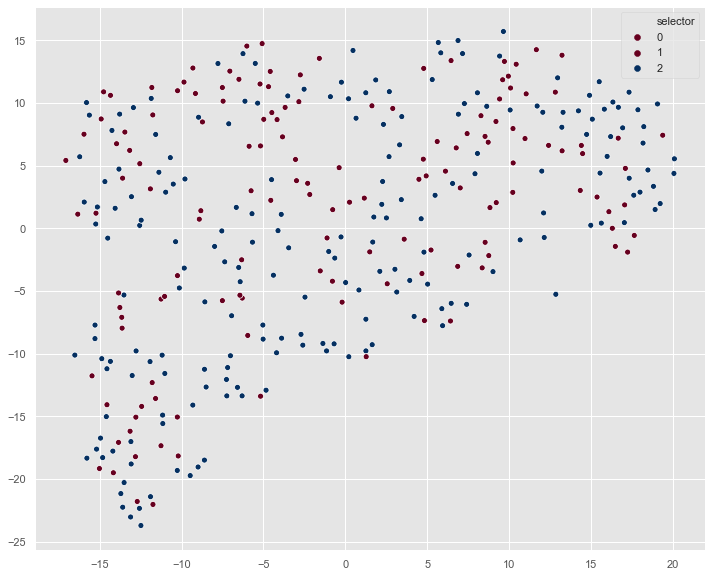

In [25]:
plt.figure(figsize=(12,10))
sns.scatterplot(x_tsne[:,0],x_tsne[:,1],hue=df.selector,palette='RdBu')
plt.show()

### MODELLING ###

In [26]:
from sklearn.svm import SVC
svm = SVC(gamma=0.1,kernel='rbf')

In [27]:
svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
svm.score(x_test,y_test)

0.5632183908045977

In [29]:
from sklearn.ensemble import GradientBoostingClassifier as GFC
gf = GFC()

In [30]:
gf.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [31]:
gf.score(x_test,y_test)

0.7701149425287356

In [32]:
from xgboost import XGBClassifier as XG
xg = XG()
xg.fit(x_train,y_train)
xg.score(x_test,y_test)

0.6781609195402298

In [33]:
from xgboost import XGBRFClassifier as XG2
xg2 = XG2()
xg2.fit(x_train,y_train)
xg2.score(x_test,y_test)

0.6551724137931034

In [34]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf = RFC()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

A:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7586206896551724

In [38]:
from sklearn.neural_network import MLPClassifier as ML
ml = ML(activation = 'logistic')
ml.fit(x_train,y_train)
ml.score(x_test,y_test)

A:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.735632183908046

In [40]:
pd.to_pickle(gf,'gf_77.pickle')

### DISPLAYING RESULTS ###

[[27 11]
 [ 9 40]]


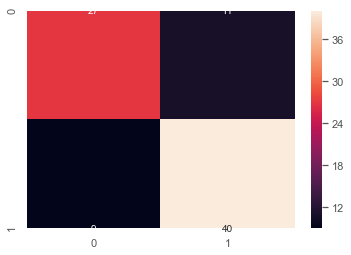

In [41]:
y_pred = gf.predict(x_test)
from sklearn.metrics import confusion_matrix as cm
print(cm(y_test,y_pred))
sns.heatmap(cm(y_test,y_pred),annot=True,fmt='d')

In [42]:
gf.score(x_test,y_test)

0.7701149425287356

In [ ]:
################## THE END ###############################